In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
# data_types = {14: str, 46: str, 78: str} 
df = pd.read_csv('../../data/embf_merged.csv')
# df.drop(['Unnamed: 0'], axis=1, inplace=True)


In [4]:
df.head()

,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,...,ASSET_CD,INCOME_CD,FILING_REQ_CD,PF_FILING_REQ_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,SORT_NAME
0,4101,SOUTH LAFOURCHE QUARTERBACK CLUB,NaN,167 BENT CYPRESS LN,LOCKPORT,LA,70374-4284,0,3,3,...,0,0,0,1,12,NaN,NaN,NaN,N65,NaN
1,260049,CORINTH BAPTIST CHURCH,NaN,PO BOX 92,HOSFORD,FL,32334-0092,2024,3,9,...,0,0,6,0,12,NaN,NaN,NaN,NaN,NaN
2,360268,IGLESIA VICTORIA,NaN,1445 N BOONVILLE AVE,SPRINGFIELD,MO,65802-1894,1678,3,9,...,0,0,6,0,12,NaN,NaN,NaN,NaN,NaN
3,490336,EASTSIDE BAPTIST CHURCH,NaN,PO BOX 296,LABELLE,FL,33975-0296,2024,3,9,...,0,0,6,0,12,NaN,NaN,NaN,NaN,NaN
4,2296179,RELIGIOUS SCIENCE CHURCH CENTER OF SAN DIEGO,NaN,4102 MARLBOROUGH,SAN DIEGO,CA,92105-1462,0,3,3,...,0,0,6,0,3,NaN,NaN,NaN,NaN,NaN


# Cities Facing Digital Divide and Climate Change

In [5]:
# specify cities targeted for analysis (from Noha analysis)
dd_cc_cities = [
    "ALEXANDRIA",
    "CHICAGO",
    "FORT LAUDERDALE",
    "LAUREL",
    "LEWISTON",
    "NASHUA",
    "NEW ORLEANS",
    "PORTLAND",
    "RALEIGH",
    "ROCHESTER",
    "SAVANNAH",
    "SEATTLE",
    "WASHINGTON",
    "WICHITA"
]

# create df with targeted cities and without
df_city = df[df['CITY'].isin(dd_cc_cities)]
df_no_dd_cc = df[~df['CITY'].isin(dd_cc_cities)]

print(df.shape)
print(df_city.shape)
print(df_no_dd_cc.shape)

(1870199, 28)
(70224, 28)
(1799975, 28)


In [6]:
# Counts of EINs per city
city_counts = df_city['CITY'].value_counts().reset_index()
city_counts.columns = ['CITY', 'COUNT']

# Get latitude and longitude for the cities
city_coords = {
    "ALEXANDRIA": [38.8048, -77.0469],
    "CHICAGO": [41.8781, -87.6298],
    "FORT LAUDERDALE": [26.1224, -80.1373],
    "LAUREL": [39.0993, -76.8483],
    "LEWISTON": [46.4165, -117.0177],
    "NASHUA": [42.7654, -71.4676],
    "NEW ORLEANS": [29.9511, -90.0715],
    "PORTLAND": [45.5051, -122.6750],
    "RALEIGH": [35.7796, -78.6382],
    "ROCHESTER": [43.1566, -77.6088],
    "SAVANNAH": [32.0809, -81.0912],
    "SEATTLE": [47.6062, -122.3321],
    "WASHINGTON": [38.9072, -77.0369],
    "WICHITA": [37.6872, -97.3301]
}

In [7]:
# Convert city coordinates dictionary to DataFrame
coords_df = pd.DataFrame.from_dict(city_coords, orient='index', columns=['Latitude', 'Longitude']).reset_index()
coords_df.rename(columns={'index': 'CITY'}, inplace=True)

# Merge coordinates with the original data
df_merged = pd.merge(city_counts, coords_df, on='CITY')

# Create the scatter plot
fig = px.scatter_mapbox(
    df_merged,
    lat='Latitude',
    lon='Longitude',
    size='COUNT',
    hover_name='CITY',
    hover_data={ 'COUNT':True,'Latitude': False, 'Longitude': False},
    size_max=15,
    zoom=3,
    mapbox_style='carto-positron',
    title='Density Map of EINs in Selected Cities'
)

# Show the plot
fig.show()

## Distribution and Allocation of Funds
### 1. How are philanthropic funds distributed across these cities?

In [8]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [9]:
# group funds by city
df_city_funds = df_city.groupby('CITY')[['INCOME_AMT', 'ASSET_AMT','REVENUE_AMT']].sum().reset_index()

# melt the data into CITY and FUND TYPE
melted_city_funds = df_city_funds.melt(id_vars=['CITY'], value_vars=['INCOME_AMT', 'ASSET_AMT', 'REVENUE_AMT'], var_name='FUND_TYPE', value_name='AMOUNT')
melted_city_funds

fig= px.bar(melted_city_funds, x='CITY', y='AMOUNT',color='FUND_TYPE',barmode='group')
fig.update_layout(
    title='Philanthropic Fund Type Breakdown By City',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='USD (billions)',
        titlefont_size=16,
        tickfont_size=14,
    ),
    xaxis=dict(
        title='City'
    ),
    legend=dict(
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

### 2. Are there significant differences in the allocation of funds between these cities engaged in addressing the digital divide and climate change compared to those that are not? 

In [10]:
df_no_climate = df_no_dd_cc.groupby('CITY')[['INCOME_AMT', 'ASSET_AMT','REVENUE_AMT']].sum().reset_index()

# melt the data into CITY and FUND TYPE
melted_no_climate = df_no_climate.melt(id_vars=['CITY'], value_vars=['INCOME_AMT', 'ASSET_AMT', 'REVENUE_AMT'], var_name='FUND_TYPE', value_name='AMOUNT')

# add city target flag 
melted_no_climate['CITY_TARGET'] = 0
melted_city_funds['CITY_TARGET'] = 1

In [11]:
# concat dfs
df_combined = pd.concat([melted_no_climate,melted_city_funds ])
df_combined.head()


,CITY,FUND_TYPE,AMOUNT,CITY_TARGET
0,AARONSBURG,INCOME_AMT,243287.00,0
1,ABBEBVILLE,INCOME_AMT,0.00,0
2,ABBEVILLE,INCOME_AMT,106803356.00,0
3,ABBOT,INCOME_AMT,8279.00,0
4,ABBOTSFORD,INCOME_AMT,466972.00,0


In [12]:
# statistically compare using hypothesis testing
from scipy import stats

def fund_amt_sig(df, fund_type='fund_type'):
    df_fundtype = df[df['FUND_TYPE']==fund_type]
    t_stat, p_value = stats.ttest_ind(
        df_fundtype[df_fundtype['CITY_TARGET']==1]['AMOUNT'],
        df_fundtype[df_fundtype['CITY_TARGET']==0]['AMOUNT'],
        equal_var=False
    )
    return print(f"T-stat: {t_stat}, P-value: {p_value}")

fund_amt_sig(df_combined, fund_type='INCOME_AMT')
fund_amt_sig(df_combined, fund_type='ASSET_AMT')
fund_amt_sig(df_combined, fund_type='REVENUE_AMT')



T-stat: 2.4902724018051576, P-value: 0.027080813603082385
T-stat: 2.973056545084501, P-value: 0.010783219367979442
T-stat: 2.838949872340522, P-value: 0.013949238686853887


### 3. How do funding types compare between targeted and non targeted cities? 

/Users/ameliabaier/opt/anaconda3/envs/t_up/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ameliabaier/opt/anaconda3/envs/t_up/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/Users/ameliabaier/opt/anaconda3/envs/t_up/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



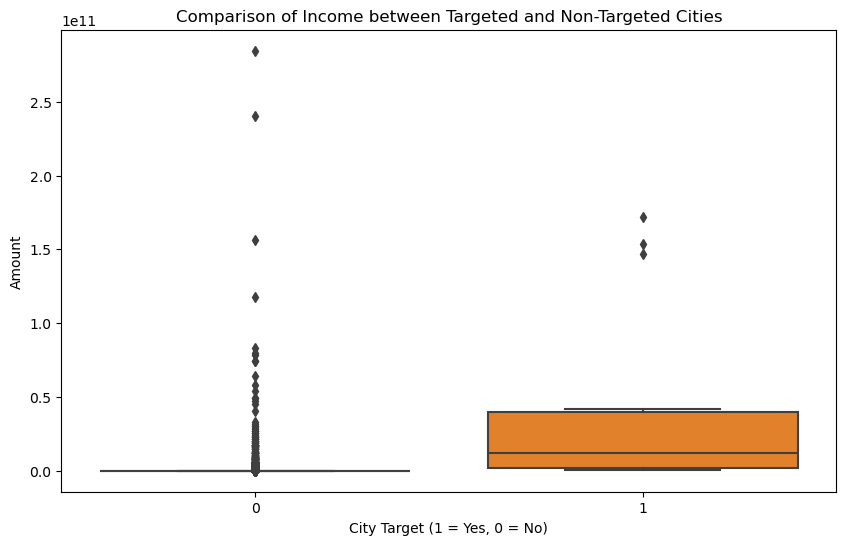

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CITY_TARGET', y='AMOUNT', data=df_combined[df_combined['FUND_TYPE']=='INCOME_AMT'])
plt.title('Comparison of Income between Targeted and Non-Targeted Cities')
plt.xlabel('City Target (1 = Yes, 0 = No)')
plt.ylabel('Amount')
plt.show()

## Financial Transparency and Accountability
### 1. How transparent are the financial activities or organizations in these cities?

In [21]:
df_city.FILING_REQ_CD.unique()

array([ 1,  2,  6,  0, 13,  3, 14,  7])

In [28]:
df_filing = df_city.copy()

aggregation = {
    1: 'Required to File',
    2: 'Required to File',
    3: 'Required to File',
    4: 'Required to File',
    6: 'Not Required to File',
    7: 'Not Required to File',
    13: 'Not Required to File',
    14: 'Not Required to File',
    0: 'Not Required to File'
}

df_filing['FILING_REQ_CD'] = df_filing['FILING_REQ_CD'].map(aggregation)

df_filing_agg = df_filing.groupby(['CITY','FILING_REQ_CD'])['EIN'].count().reset_index()
df_filing_agg

,CITY,FILING_REQ_CD,EIN
0,ALEXANDRIA,Not Required to File,573
1,ALEXANDRIA,Required to File,3450
2,CHICAGO,Not Required to File,6015
3,CHICAGO,Required to File,13736
4,FORT LAUDERDALE,Not Required to File,75
5,FORT LAUDERDALE,Required to File,236
6,LAUREL,Not Required to File,273
7,LAUREL,Required to File,762
8,LEWISTON,Not Required to File,89
9,LEWISTON,Required to File,506


In [29]:

fig = px.bar(df_filing_agg, x='CITY', y='EIN', color='FILING_REQ_CD',barmode='group')
fig.update_layout(
    title='Tax Filing Requirement Distribution by City',
    yaxis=dict(
        title='Number of Organizations'
    ),
    xaxis=dict(
        title='City'
    )
)
fig.show()

## Trends over Time
### 1. How has the growth of nonprofit organizations evolved over time in these cities?
### 2. Can we deduce historical events or trends in these cities by looking at the ruling date of organizations? / How have policy changes impacted the establishment of nonprofit organizations in these cities?
### 3. How have different sectors (e.g., education, healthcare) evolved over time in terms of nonprofit establishment and funding?


In [37]:
df_city.TAX_PERIOD.unique()

array([202212., 202112., 202012.,     nan, 202206., 202006., 202106.,
       202108., 202203., 202209., 201512., 202109., 202211., 201912.,
       202105., 202202., 202205., 202207., 200612., 202208., 201812.,
       202201., 202303., 202007., 202004., 201012., 202110., 202210.,
       202101., 202204., 202010., 202301., 202009., 202107., 202103.,
       201212., 202302., 202008., 202305., 200312., 202304., 202111.,
       201312., 202104., 202102., 202005., 201309., 202003., 201907.,
       201406., 200912., 201712., 202001., 201112., 201811., 200904.,
       201906., 201412., 201909., 202002., 201908., 201612., 201404.,
       201405., 199812., 201611., 199912., 199412., 200806., 200512.,
       201905., 200506., 201306., 200412., 202011., 200906., 200812.,
       199712., 201902., 201705., 201808., 201810., 201806., 200712.,
       200807., 199706., 201506., 199512., 200212., 201103., 200112.,
       201606., 200809., 199112., 199208., 201203., 199708., 201407.,
       201308., 2005